<a href="https://colab.research.google.com/github/melquemz/Detectando_Fraude/blob/main/Detectando_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação, leitura e limpeza dos dados.



In [1]:
import numpy as np
import pandas as pd
from scipy import special
import itertools
from datetime import timedelta
from IPython.display import display

In [2]:
fraude_df = pd.read_csv('Fraud_Data.csv', header = 0) #header igual a '0' para que os nomes das variaveis sejam a linha '0'
ISP_df = pd.read_csv('IpAddress_to_Country.csv', header = 0)

In [3]:
fraude_df.dtypes

id                  int64
cadastro           object
compra             object
valor               int64
id_dispositivo     object
fonte              object
browser            object
genero             object
idade               int64
ip                float64
fraude              int64
dtype: object

In [4]:
for col in fraude_df.columns:
    print("# de valores nulos em {}: {}".format(col, fraude_df[col].isnull().sum()))

# de valores nulos em id: 0
# de valores nulos em cadastro: 0
# de valores nulos em compra: 0
# de valores nulos em valor: 0
# de valores nulos em id_dispositivo: 0
# de valores nulos em fonte: 0
# de valores nulos em browser: 0
# de valores nulos em genero: 0
# de valores nulos em idade: 0
# de valores nulos em ip: 0
# de valores nulos em fraude: 0


In [5]:
ISP_df.dtypes

limite_inferior_ip    float64
limite_superior_ip      int64
pais                   object
dtype: object

In [6]:
for col in ISP_df.columns:
    print("{}: {}".format(col, ISP_df[col].dtype))

limite_inferior_ip: float64
limite_superior_ip: int64
pais: object


In [7]:
ip_floats = ISP_df.limite_inferior_ip.apply(lambda x: not x.is_integer()).sum() # ver se tem algum float no inferior_ip
print("Número de limites inferiores de endereço IP com decimal não-zero: {}".format(ip_floats))

Número de limites inferiores de endereço IP com decimal não-zero: 0


In [8]:
ISP_df.limite_inferior_ip = ISP_df.limite_inferior_ip.astype(np.int64) # convertendo o tipo da variavel para inteiro

In [9]:
ISP_df.dtypes

limite_inferior_ip     int64
limite_superior_ip     int64
pais                  object
dtype: object

In [10]:
for col in ISP_df.columns:
    print("# de valores nulos em {}: {}".format(col, ISP_df[col].isnull().sum()))

# de valores nulos em limite_inferior_ip: 0
# de valores nulos em limite_superior_ip: 0
# de valores nulos em pais: 0


In [11]:
fraude_df

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [12]:
ISP_df

,limite_inferior_ip,limite_superior_ip,pais
0,16777216,16777471,Australia
1,16777472,16777727,China
2,16777728,16778239,China
3,16778240,16779263,Australia
4,16779264,16781311,China
...,...,...,...
138841,3758092288,3758093311,Hong Kong
138842,3758093312,3758094335,India
138843,3758095360,3758095871,China
138844,3758095872,3758096127,Singapore


In [13]:
ISP_df.describe()

,limite_inferior_ip,limite_superior_ip
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [14]:
display(ISP_df[ISP_df.limite_inferior_ip == ISP_df.limite_inferior_ip.max()]) #olhando se tem um outline nesse valor maximo do ip inferior
display(ISP_df[ISP_df.limite_superior_ip == ISP_df.limite_superior_ip.max()])

,limite_inferior_ip,limite_superior_ip,pais
138845,3758096128,3758096383,Australia


,limite_inferior_ip,limite_superior_ip,pais
138845,3758096128,3758096383,Australia


In [15]:
ISP_df.shape

(138846, 3)

In [16]:
def isp_counts(isp):
    pais = ISP_df[(ISP_df.limite_inferior_ip <= isp) & (ISP_df.limite_superior_ip >= isp)].pais # vai pegar o ip do dataframe fraude_df e busca ele no dataframe ISP_df, .pais para contar
    if pais.shape[0] == 1:
        return pais.iloc[0] 


ip_counts = fraude_df.ip.apply(isp_counts)
ip_counts.value_counts()

United States        58049
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
                     ...  
Myanmar                  1
Vanuatu                  1
Dominica                 1
Niger                    1
Guadeloupe               1
Name: ip, Length: 181, dtype: int64

In [17]:
# fazer um funcao que vai ler todos os ips no banco de dados para saber se eles estao dentro da contagem do outro banco de dados

def isp_counts(isp):
    pais = ISP_df[(ISP_df.limite_inferior_ip <= isp) & (ISP_df.limite_superior_ip >= isp)].pais # se o ip estiver dentro do limite inferior de ips e dentro do limite superior, esta tudo certo
    if pais.shape[0] == 1: ## o shape vai retorna (1,) ou (0,)... por isso shape[0] 
        return print("Único")
    elif pais.shape[0] > 1:
        return print("Vários países")
    elif pais.shape[0] == 0:
        if isp > ISP_df.limite_superior_ip.max():
            return print("Muito grande") # grande chance de fraude
        elif isp < ISP_df.limite_inferior_ip.min(): # estava errado com _min
            return print("Muito pequeno") # grande chance de fraude
        else:
            return print("Faltando") # grande chance de fraude

ip_counts = fraude_df.ip.apply(isp_counts)
ip_counts.value_counts()

A saída de streaming foi truncada nas últimas 5000 linhas.
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Ún

Series([], Name: ip, dtype: int64)

In [18]:
def ip_para_pais(ip):
    tmp = ISP_df[(ISP_df.limite_inferior_ip <= ip)
            & (ISP_df.limite_superior_ip >= ip)].pais
    if tmp.shape[0] == 1:
        return tmp.iloc[0] # vai retorna a localizacao dessa informacao, que é o nome do pais
    elif tmp.shape[0] < 1:
        return print("Faltando") # grande chance de fraude
    elif tmp.shape[0] > 1:
        return print("Erro")

fraude_df["pais"] = fraude_df.ip.apply(ip_para_pais)

A saída de streaming foi truncada nas últimas 5000 linhas.
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Falta

In [19]:
fraude_df.to_csv("Dados_fraude_com_pais", index = False)
fraude_df = pd.read_csv("Dados_fraude_com_pais", header = 0)
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


#Análise exploratória, visualizações avançadas.




In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Casos')

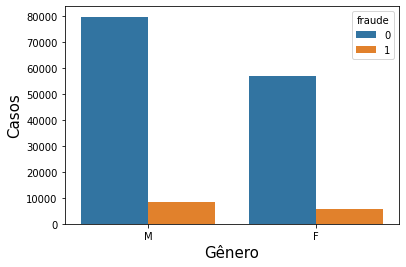

In [21]:
sns.countplot(x = "genero", hue = "fraude", data = fraude_df)
plt.xlabel("Gênero", fontsize = 15)
plt.ylabel("Casos", fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.42499999999999716, 0.5, 'Valor de compra')

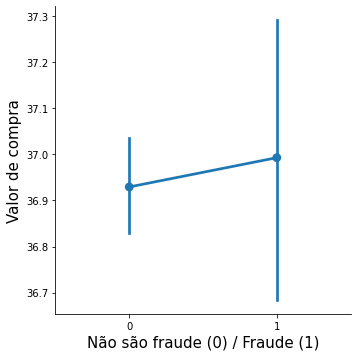

In [22]:
sns.factorplot(x = "fraude", y = "valor", data = fraude_df)
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize = 15)
plt.ylabel("Valor de compra", fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-5.825000000000003, 0.5, 'Idade')

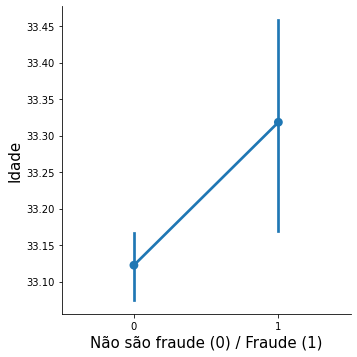

In [23]:
sns.factorplot(x = "fraude", y="idade", data = fraude_df)
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize = 15)
plt.ylabel("Idade", fontsize = 15)

Text(0, 0.5, 'Contagem')

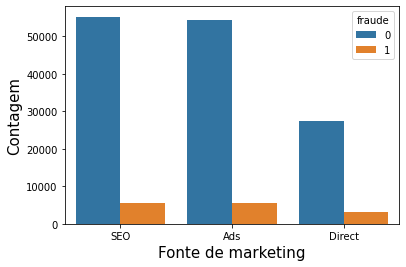

In [24]:
sns.countplot(x = "fonte", hue = "fraude", data = fraude_df) #Perceberemos que, de forma geral, não parece existir uma fonte específica mais associada às fraudes, tambem percebemos que o numero de fonte directa é menor, provavelmente tem haver com a campanha não ser tão bem sucedida quanto a otimização dos mecanismos de pesquisa e anúncio para atrair clientes ao site
plt.xlabel("Fonte de marketing", fontsize = 15)
plt.ylabel("Contagem", fontsize = 15)

In [25]:
sums_f = fraude_df[fraude_df["fraude"] == 1]["fraude"].groupby(fraude_df.pais).sum() # agrupar os que sao fraude
sums_f 

pais
Afghanistan               1
Algeria                  13
Angola                    1
Argentina                66
Armenia                   2
                         ..
Uruguay                   5
Uzbekistan                2
Venezuela                33
Viet Nam                 37
Virgin Islands (U.S.)     1
Name: fraude, Length: 109, dtype: int64

In [26]:
sums_f = sums_f.to_frame().reset_index()
sums_f

,pais,fraude
0,Afghanistan,1
1,Algeria,13
2,Angola,1
3,Argentina,66
4,Armenia,2
...,...,...
104,Uruguay,5
105,Uzbekistan,2
106,Venezuela,33
107,Viet Nam,37


In [27]:
sums_nf = fraude_df[fraude_df["fraude"] == 0]["fraude"].groupby(fraude_df.pais).sum() # agrupar os que nao sao fraude
sums_nf = sums_nf.to_frame().reset_index()

Text(0, 0.5, 'Países')

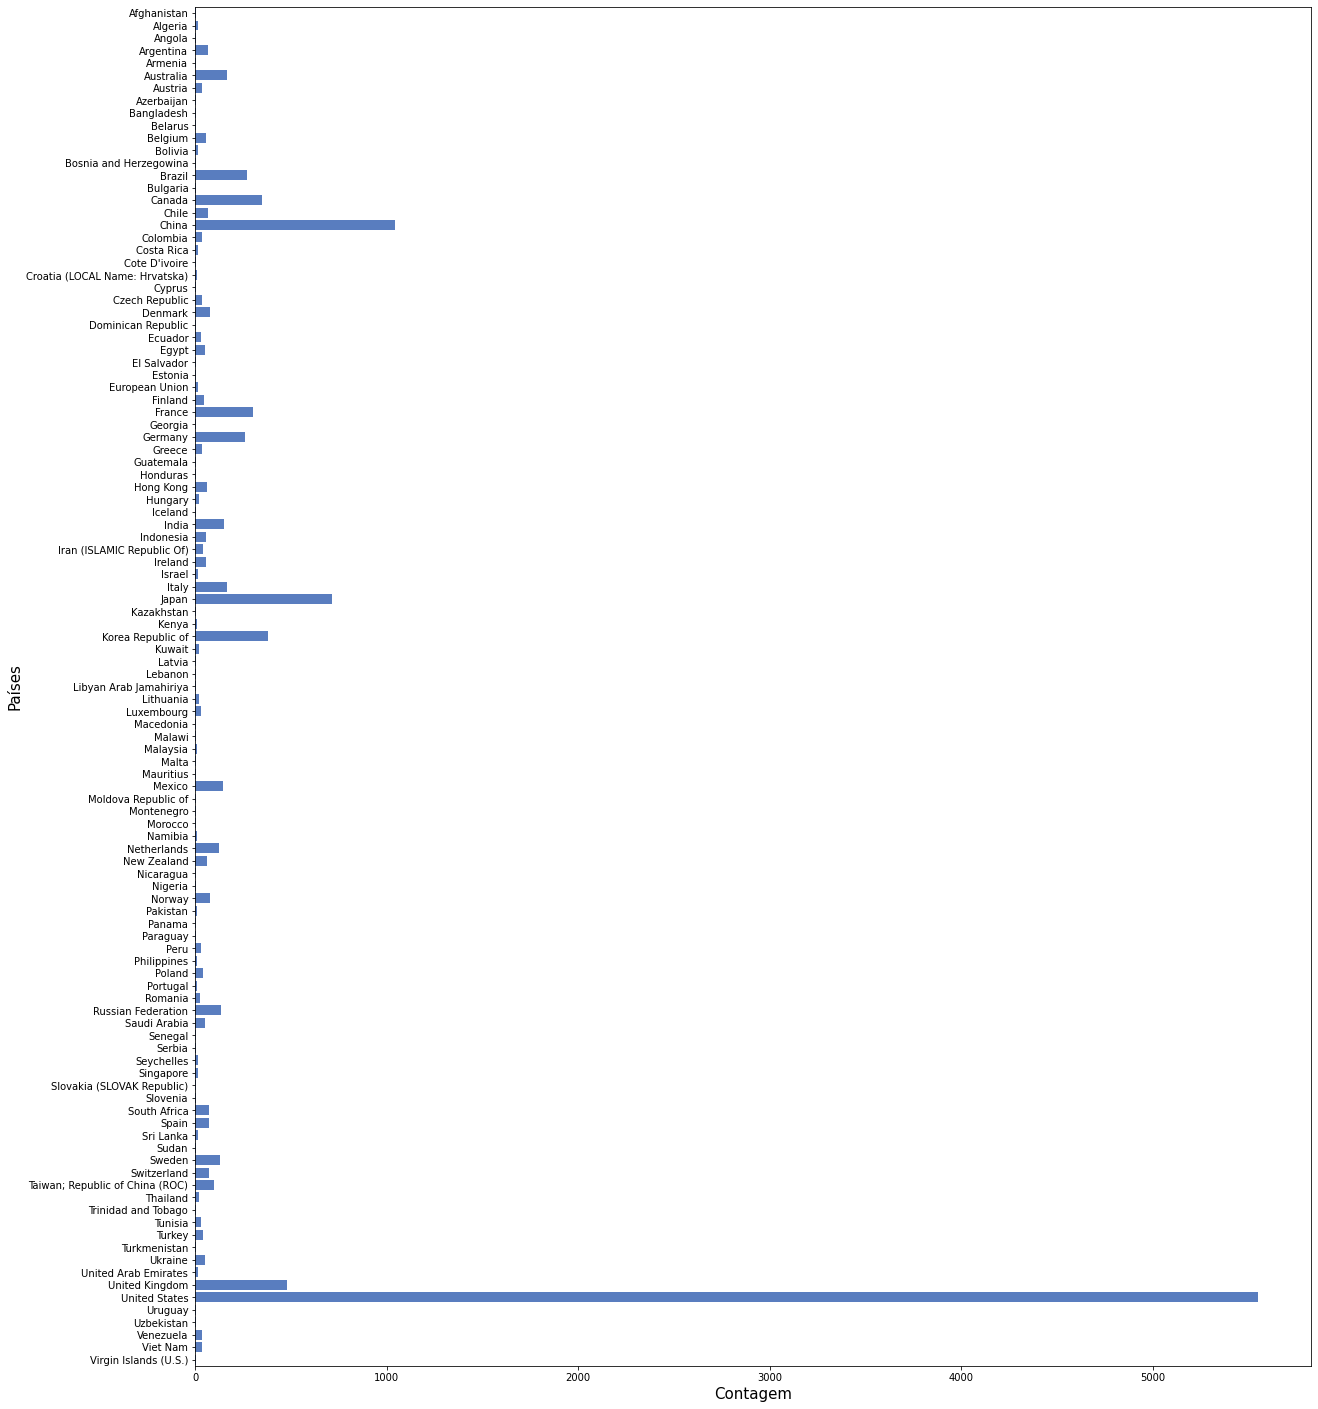

In [28]:
f, ax = plt.subplots(figsize=(20,25))
sns.set_color_codes("muted")
sns.barplot(x = "fraude", y = "pais", data = sums_f,
            label = "Total", color = "b")
plt.xlabel("Contagem",fontsize = 15)
plt.ylabel("Países",fontsize = 15)

In [29]:
tmp_df = pd.DataFrame(columns = ("fraude","id_por_dispositivo","id_por_ip")) # criando new dataframe
tmp_df["fraude"] = fraude_df["fraude"]

userid_count = fraude_df.groupby("id_dispositivo").id.count()# pegando a quantidade de ids no mesmo dispositivo
userid_count

id_dispositivo
AAALBGNHHVMKG     1
AAAWIHVCQELTP     1
AAAXJHWCLISKY     1
AAAXXOZJRZRAO    11
AABFGRPBQHWFQ     1
                 ..
ZZZGSIJRNCXBJ     1
ZZZIKLJSVSQMF     1
ZZZKJIZHJEDFN     1
ZZZMVOGBAJVTM     1
ZZZXASJUVUNMV     1
Name: id, Length: 137956, dtype: int64

In [30]:
userid_count = fraude_df.groupby("id_dispositivo").id.count() # pegando a quantidade de ids no mesmo dispositivo 
tmp_df["id_por_dispositivo"] = fraude_df.id_dispositivo.apply(lambda x: userid_count[x]) # o apply vai percorrer userid_count e add em tmp_df usando a funcao anonima lambda

userid_count2 = fraude_df.groupby("ip").id.count()
tmp_df["id_por_ip"] = fraude_df.ip.apply(lambda x: userid_count2[x])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(16.299999999999997, 0.5, 'ID de usuário por endereço IP')

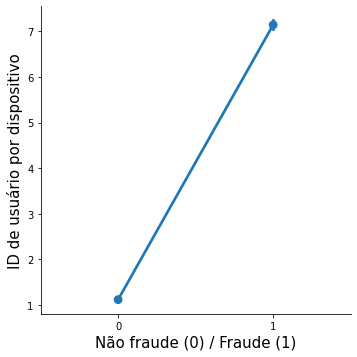

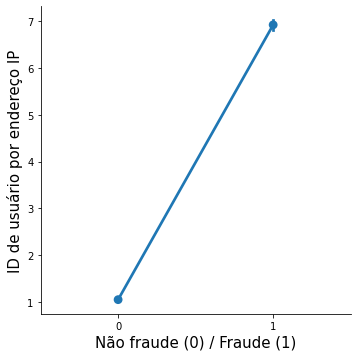

In [31]:
sns.factorplot(x = "fraude", y = "id_por_dispositivo", data = tmp_df)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize = 15)
plt.ylabel("ID de usuário por dispositivo", fontsize = 15)

sns.factorplot(x = "fraude", y = "id_por_ip", data = tmp_df)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize = 15)
plt.ylabel("ID de usuário por endereço IP", fontsize = 15)

In [32]:
tmp_df["cadastro"] = fraude_df.cadastro.apply(pd.to_datetime) # to_datetime vai indentificar que aquilo ali e data e hora, e vai separa essas informacoes
tmp_df["compra"] = fraude_df.compra.apply(pd.to_datetime)

tmp_df["tempo"] = (tmp_df.compra - tmp_df.cadastro).apply(lambda x: x.seconds)

tmp_df

,fraude,id_por_dispositivo,id_por_ip,cadastro,compra,tempo
0,0,1,1,2015-02-24 22:55:49,2015-04-18 02:47:11,13882
1,0,1,1,2015-06-07 20:39:50,2015-06-08 01:38:54,17944
2,1,12,12,2015-01-01 18:52:44,2015-01-01 18:52:45,1
3,0,1,1,2015-04-28 21:13:25,2015-05-04 13:54:50,60085
4,0,1,1,2015-07-21 07:09:52,2015-09-09 18:40:53,41461
...,...,...,...,...,...,...
151107,1,2,1,2015-01-27 03:03:34,2015-03-29 00:30:47,77233
151108,0,1,1,2015-05-15 17:43:29,2015-05-26 12:24:39,67270
151109,0,1,1,2015-03-03 23:07:31,2015-05-20 07:07:47,28816
151110,0,2,1,2015-07-09 20:06:07,2015-09-07 09:34:46,48519


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-8.825000000000003, 0.5, 'Tempo entre início e compra (segundos)')

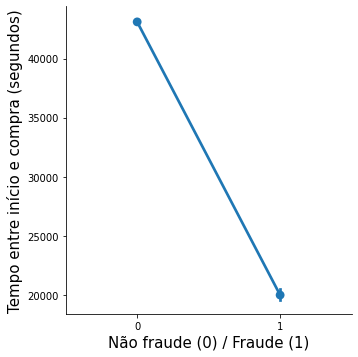

In [33]:
sns.factorplot(x = "fraude", y = "tempo", data = tmp_df)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize = 15)
plt.ylabel("Tempo entre início e compra (segundos)", fontsize = 15)

Text(0, 0.5, 'Contagem')

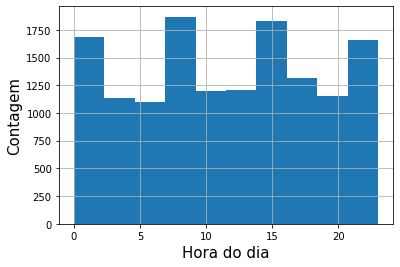

In [34]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.hour).hist()
plt.xlabel("Hora do dia", fontsize = 15)
plt.ylabel("Contagem", fontsize = 15)

Text(0, 0.5, 'Contagem')

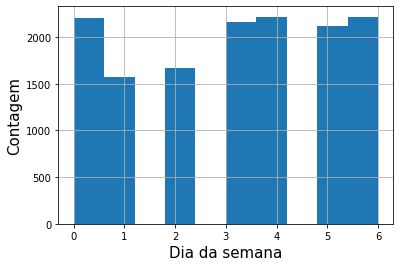

In [35]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.dayofweek).hist()
plt.xlabel("Dia da semana", fontsize = 15)
plt.ylabel("Contagem", fontsize = 15)

Text(0, 0.5, 'Contagem')

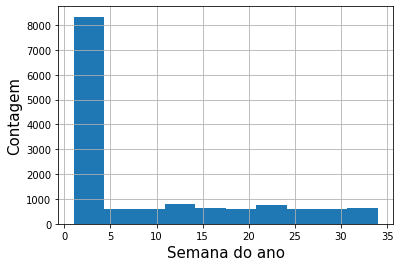

In [36]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.week).hist()
plt.xlabel("Semana do ano", fontsize = 15)
plt.ylabel("Contagem", fontsize = 15)

#Engenharia de recursos, Identificando as variáveis importantes

In [37]:
userid_count3 = fraude_df.groupby("id_dispositivo").id.count()
fraude_df["id_por_dispositivo"] = fraude_df.id_dispositivo.apply(lambda x: userid_count3[x])

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1


In [38]:
userid_count4 = fraude_df.groupby("ip").id.count()
fraude_df["id_por_ip"] = fraude_df.ip.apply(lambda x: userid_count4[x])

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1


In [39]:
fraude_df["media_id"] = (fraude_df.id_por_dispositivo + fraude_df.id_por_ip) * 0.5

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,media_id
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1,1.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0


In [40]:
fraude_df.cadastro = fraude_df.cadastro.apply(pd.to_datetime)
fraude_df.compra = fraude_df.compra.apply(pd.to_datetime)
fraude_df["tempo"] = (fraude_df.compra - fraude_df.cadastro).apply(lambda x: x.seconds)

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,media_id,tempo
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1,1.0,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0,41461


In [41]:
pais_dummies = pd.get_dummies(fraude_df.pais, prefix = 'pais')
fraude_df = pd.concat([fraude_df, pais_dummies], axis = 1)

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,...,pais_United States,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,0,0,0,0,0,0,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,1,0,0,0,0,0,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,1,0,0,0,0,0,0,0,0,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,...,0,0,0,0,0,0,0,0,0,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,1,0,0,0,0,0,0,0,0,0


In [42]:
fraude_df.drop(["id",
            "cadastro",
            "compra",
            "id_dispositivo",
            "ip",
            "id_por_dispositivo",
            "id_por_ip",
            "pais",
            "fonte",
            "browser",
            "genero",
            "idade",
            "valor"], axis=1, inplace = True)

In [43]:
fraude_df

,fraude,media_id,tempo,pais_Afghanistan,pais_Albania,pais_Algeria,pais_Angola,pais_Antigua and Barbuda,pais_Argentina,pais_Armenia,...,pais_United States,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe
0,0,1.0,13882,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,17944,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,12.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,60085,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.0,41461,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,1,1.5,77233,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
151108,0,1.0,67270,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151109,0,1.0,28816,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151110,0,1.5,48519,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Contagem normalizada')

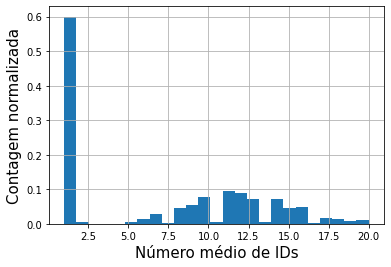

In [44]:
fraude_df[fraude_df["fraude"] == 1].media_id.hist(density = True, stacked = True, bins = 25) # de inicio usei o normed = True, para normalizar, mas deu erro, entao usei o density = True para normalizar
plt.xlabel("Número médio de IDs", fontsize = 15)
plt.ylabel("Contagem normalizada", fontsize = 15) # A quantidade de vezes que aconteceu, so que normalizado 

# A media_id ja é uma distribuicao gaussiana, entao nao vai ser peciso mexe agora

Text(0, 0.5, 'Contagem normalizada')

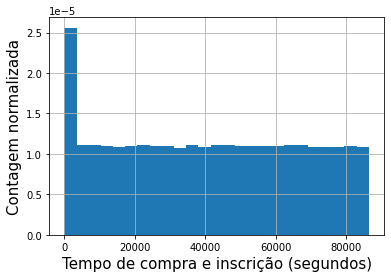

In [45]:
fraude_df.tempo.hist(density = True, stacked = True, bins = 25)
plt.xlabel("Tempo de compra e inscrição (segundos)", fontsize = 15)
plt.ylabel("Contagem normalizada", fontsize = 15)

# O tempo ainda nao é uma distribuicao gaussiana, entao sera necessario rescale ela, os algoritmos de detecção de anomalias que usaremos se beneficiarao de recursos mais gaussianos

In [46]:
def rescale_series(ser):
    ser_min = ser.min() - 1e-5 #1e-5 margem de erro
    ser_max = ser.max() + 1e-5
    new_ser = (ser - ser_min) / (ser_max - ser_min)
    new_ser = new_ser.apply(lambda x: np.sqrt(2)*special.erfinv(2*x - 1)) #sqrt(2) raiz quadrada de 2, special.erfinv(2*x - 1) funcao especial. funcao erro invertida 
    return new_ser

Text(0, 0.5, 'Contagem normalizada')

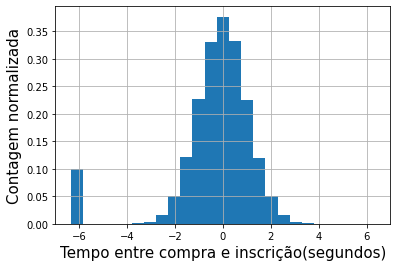

In [47]:
fraude_df["tempo"] = rescale_series(fraude_df.tempo)
fraude_df.tempo.hist(density = True, stacked = True, bins = 25)
plt.xlabel("Tempo entre compra e inscrição(segundos)", fontsize = 15)
plt.ylabel("Contagem normalizada", fontsize = 15)

In [48]:
def rescale_series(ser):
    ser_min = ser.min()
    ser_max = ser.max()
    new_ser = (ser - ser_min) / (ser_max - ser_min)
    return new_ser

In [49]:
onehotencoded = [feature for feature in fraude_df.columns if "pais" not in feature and feature != "fraude"]

onehotencoded

['media_id', 'tempo']

In [50]:
for col in onehotencoded:
    fraude_df[col] = rescale_series(fraude_df[col])

    X = fraude_df[ [col for col in fraude_df.columns if col != "fraude"]]
    Y = fraude_df["fraude"]

In [51]:
X.to_csv("X.csv", index = False)
Y.to_csv("Y.csv", index = False)

In [52]:
# No momento temos muitos recursos entao precisamos ver quais desses recursos realmente tem importancia

from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
_ = clf.fit(X,Y)

features = pd.DataFrame()
features['feature'] = X.columns
features['importancia'] = clf.feature_importances_ # ele calcular a importancia das variaveis automaticamente

features [features.importancia > np.mean(features.importancia)].sort_values(by="importancia", ascending=False) # sort_values, organiza de forma decrescente

,feature,importancia
1,tempo,0.670008
0,media_id,0.324502


#Criando Métricas de performance, modelos preditivos, supervisionada, não-supervisionado

In [53]:
from sklearn.preprocessing import RobustScaler # removerá a mediana e dimensionará os dados de acordo com as faixas dos quartis, como uma forma de normalização.
from sklearn.model_selection import train_test_split # separar os dados de treinamento e de validação.
from sklearn.ensemble import IsolationForest # modelo, selecionará variáveis de forma recursiva para tentar separar nossa amostra. Essa divisão pode ser representada como uma estrutura de árvore
from sklearn.model_selection import GridSearchCV # responsável pela metodologia que usaremos para rodar várias vezes e encontrar os melhores recursos.
from sklearn.metrics import classification_report, roc_auc_score, roc_curve # área debaixo da curva ROC, e o proprio roc_curve
from sklearn.metrics import f1_score # métrica

In [54]:
X_dev, X_eval, Y_dev, Y_eval = train_test_split(X, Y, train_size = 0.75, random_state = 23)

# A Floresta de Isolamento normalmente retorna valores de 1 para casos normais e -1 para casos anômalos

Y_dev = Y_dev.apply(lambda x: 1 if x == 0 else -1)
Y_eval = Y_eval.apply(lambda x: 1 if x == 0 else -1)

In [55]:
IF = IsolationForest(max_samples = "auto", contamination = 0.095, random_state = 1) # nossa Floresta de Isolamento, número de amostras máximas max_samples, percentual em contamination que representa as amostras anômalas, e o valor de random_state que é a semente
param_grid = {"n_estimators": [100, 150, 200, 250, 300, 350, 400, 450, 500]} # é o numero de estimadores, para chamarmos varios estimadores ou número de árvores dessa floresta

clf = GridSearchCV(IF,
                param_grid, # parametro de variação
                cv = 5, # realizaremos uma validação cruzada cinco vezes para não rodar apenas uma vez,
                n_jobs = 10,
                scoring = "f1",
                verbose = 10) # primeiro parametro o modelo, parametro que quero variar vai ser o param_grid, cv é o numero de cross validation rode a quantidade de vezes inserida, n_jobs número de vezes em que rodará em paralelo, coring para determinar qual é o melhor, e verbose para escreva o processo

_ = clf.fit(X_dev, Y_dev)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [56]:
IF_best = clf.best_estimator_ # melhores estimadores que conseguimos no IsolationForest
Y_predicted = IF_best.predict(X_eval) # preverá o comportamento usando os valores que foram os melhores
roc_auc = roc_auc_score(Y_eval, Y_predicted) # definiremos a curva roc_auc com roc_auc_score(), que será em função do target de teste Y_eval, o qual será testado com o melhor modelo Y_predicted

print (classification_report(Y_eval,
                Y_predicted,
                target_names=["anomalo","normal"])) # dará as informações dos resultados e métricas

print("Area sob a curva ROC: %.3f" % roc_auc )

              precision    recall  f1-score   support

     anomalo       0.48      0.48      0.48      3546
      normal       0.95      0.95      0.95     34232

    accuracy                           0.90     37778
   macro avg       0.71      0.71      0.71     37778
weighted avg       0.90      0.90      0.90     37778

Area sob a curva ROC: 0.712


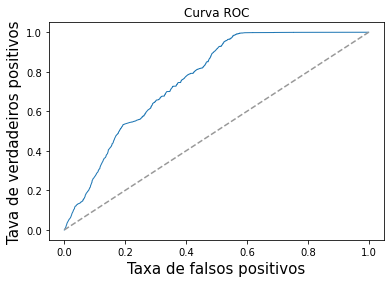

In [57]:
IF_probs = IF_best.decision_function(X_eval) # computaremos a curva e a área
fpr, tpr, threshold = roc_curve(Y_eval, IF_probs) # falsos positivos fpr, os verdadeiros positivos tpr, e o threshold do limite sendo iguais a roc_curve() recebendo Y_eval e IF_probs.

plt.plot(fpr, tpr, lw = 1) # lw sendo 1 para a largura da linha.

plt.plot([0,1],[0,1], '--', color = (0.6,0.6,0.6), label = "sorte") # se tivermos escolhido o que é fraude e o que não é aleatoriamente
plt.xlim([-0.05, 1.05]) # Ajustaremos os limites de x e y para que não fiquem muito grandes.
plt.ylim([-0.05, 1.05])

plt.xlabel("Taxa de falsos positivos", fontsize = 15)
plt.ylabel("Tava de verdadeiros positivos", fontsize = 15)
plt.title("Curva ROC", fontsize = 12)

plt.show()

In [58]:
from sklearn.metrics import confusion_matrix
cnf_matrix_IF = confusion_matrix(Y_eval, Y_predicted)
print(cnf_matrix_IF)

[[ 1694  1852]
 [ 1872 32360]]


In [59]:
import random

X["fraude"] = Y

X_anomalias = X[X['fraude'] == 1]
X_normal = X[X['fraude'] == 0]

train_idxs = random.sample(list(X_normal.index), int(0.7*X_normal.shape[0]))
X_train = X_normal.loc[train_idxs] # loc[] para recebermos a localização de train_idxs

X_testing = X_normal.drop(train_idxs)

X_testing = pd.concat([X_testing, X_anomalias], axis=0)

X_train = X_train.sample(frac=1).reset_index(drop=True) # embaralhar as linhas para ambos os conjuntos com a função sample() com frac=1 da semente randômica
X_testing = X_testing.sample(frac=1).reset_index(drop=True)

Y_testing = X_testing['fraude']
X_testing = X_testing [ [col for col in X_testing.columns if col != 'fraude']]

X_cv, X_eval, Y_cv, Y_eval = train_test_split(X_testing, Y_testing, train_size = 0.7, random_state=23)

Y_cv = Y_cv.apply(lambda x: 1 if x==0 else -1)
Y_eval = Y_eval.apply(lambda x: 1 if x==0 else -1)

X_train = X_train[ [col for col in X_testing.columns if col != 'fraude']]

In [60]:
param_grid = {"nu": np.linspace(0.001, 0.01, 5), "gamma": [0.01, 0.03, 0.1, 0.3]} # linspace criando um espaço linear, que sai de 0,001, andando a passos de 0,01 ate 5, gamma vai varia entre 0,01 e 0,03

param_list = list(itertools.product(param_grid["nu"],param_grid["gamma"]))
param_list

[(0.001, 0.01),
 (0.001, 0.03),
 (0.001, 0.1),
 (0.001, 0.3),
 (0.0032500000000000003, 0.01),
 (0.0032500000000000003, 0.03),
 (0.0032500000000000003, 0.1),
 (0.0032500000000000003, 0.3),
 (0.0055000000000000005, 0.01),
 (0.0055000000000000005, 0.03),
 (0.0055000000000000005, 0.1),
 (0.0055000000000000005, 0.3),
 (0.007750000000000001, 0.01),
 (0.007750000000000001, 0.03),
 (0.007750000000000001, 0.1),
 (0.007750000000000001, 0.3),
 (0.01, 0.01),
 (0.01, 0.03),
 (0.01, 0.1),
 (0.01, 0.3)]

In [61]:
from sklearn.svm import OneClassSVM
import numpy as np
np.random.seed(1)

def random_gridsearch(param_list, n_sample, X_train, X_cv, Y_cv):

    f1_max = 0
    param_list = random.sample(param_list, n_sample) # vai pegar os parametros de forma aleatoria
    remaining_fits = n_sample
    for params in param_list:
        nu, gamma = params # preciso de esplicaçao pois aqui era pra retorna mais
        OCSVM = OneClassSVM(kernel="rbf", nu=nu, gamma=gamma)
        print('Fitando modelo...')
        OCSVM.fit(X_train) # ta treinando so com os caso que nao tem fraude, dessa forma ele vai reconhecer bem os casos de nao fraude

        cv_preds = OCSVM.predict(X_cv)
        f1 = f1_score(Y_cv.values, cv_preds, average="binary") # calculando o fi score

        if f1 > f1_max:
            f1_max = f1
            OCSVM_best = OCSVM # melhor modelo

            remaining_fits -=1

    return f1_max, OCSVM

f1_max, OCSVM_best = random_gridsearch(param_list, 10, X_train, X_cv, Y_cv)

Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...


              precision    recall  f1-score   support

    anormais       0.96      0.47      0.63      4242
     normais       0.85      0.99      0.91     12330

    accuracy                           0.86     16572
   macro avg       0.90      0.73      0.77     16572
weighted avg       0.88      0.86      0.84     16572

Área sob a curva ROC: 0.733


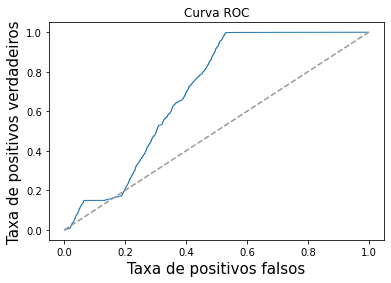

In [62]:
OSCVM_best = OCSVM_best.fit(X_train)
Y_predicted = OSCVM_best.predict(X_eval)
roc_auc = roc_auc_score(Y_eval, Y_predicted)

print(classification_report(Y_eval,
                            Y_predicted,
                            target_names=['anormais', 'normais']))

print('Área sob a curva ROC: {:0.3f}'.format(roc_auc))

OCSVM_probs = OCSVM_best.decision_function(X_eval)
fpr, tpr, threshold = roc_curve(Y_eval, OCSVM_probs)

plt.plot(fpr, tpr, lw=1, label='ROC')
plt.plot([0,1], [0,1], '--', color=[0.6, 0.6, 0.6], label='sorte')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('Taxa de positivos falsos', fontsize=15)
plt.ylabel('Taxa de positivos verdadeiros', fontsize=15)
plt.title('Curva ROC')

plt.show()

In [63]:
print(confusion_matrix(Y_eval, Y_predicted))

[[ 2000  2242]
 [   75 12255]]


              precision    recall  f1-score   support

    anormais       0.96      0.88      0.92      4242
     normais       0.96      0.99      0.97     12330

    accuracy                           0.96     16572
   macro avg       0.96      0.93      0.95     16572
weighted avg       0.96      0.96      0.96     16572

Área sob a curva ROC: 0.934


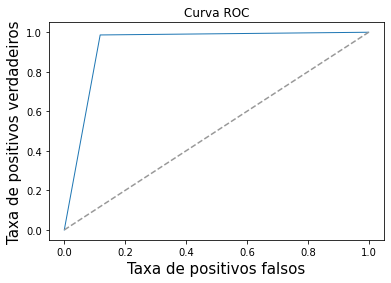

In [64]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_dev, Y_dev)

Y_predicted = decision_tree.predict(X_eval)
roc_auc = roc_auc_score(Y_eval, Y_predicted)

cv_preds = decision_tree.predict(X_cv)
print(classification_report(Y_eval,
                            Y_predicted,
                            target_names=['anormais', 'normais']))

print('Área sob a curva ROC: %.3f' % roc_auc )

dt_probs = decision_tree.predict_proba(X_eval)
fpr, tpr, _ = roc_curve(Y_eval, Y_predicted)

plt.plot(fpr, tpr, lw=1, label='ROC')
plt.plot([0,1], [0,1], '--', color=[0.6, 0.6, 0.6], label='sorte')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('Taxa de positivos falsos', fontsize=15)
plt.ylabel('Taxa de positivos verdadeiros', fontsize=15)
plt.title('Curva ROC')

plt.show()

In [65]:
print(confusion_matrix(Y_eval, Y_predicted))

[[ 3742   500]
 [  169 12161]]
